In [236]:
# Importing dependencies
import json
import pandas as pd
import numpy as np
import re

In [237]:
# Defining file location
file_dir = r'C:\Users\dhanu\Desktop\Analysis Project\Movies ETL\Movies-ETL\Resources'

In [238]:
# Reading file as dictionaries
with open (f'{file_dir}\wikipedia-movies.json') as file:
    wiki_data=json.load(file)

In [239]:
len(wiki_data)

7311

In [240]:
wiki_data[3750]

{'url': 'https://en.wikipedia.org/wiki/Ray_(film)',
 'year': 2004,
 'imdb_link': 'https://www.imdb.com/title/tt0350258/',
 'title': 'Ray',
 'Directed by': 'Taylor Hackford',
 'Produced by': ['Taylor Hackford',
  'Stuart Benjamin',
  'Howard Baldwin',
  'Karen Baldwin'],
 'Screenplay by': 'James L. White',
 'Story by': ['Taylor Hackford', 'James L. White'],
 'Starring': ['Jamie Foxx',
  'Kerry Washington',
  'Clifton Powell',
  'Harry Lennix',
  'Terrence Howard',
  'Larenz Tate',
  'Richard Schiff',
  'Regina King'],
 'Music by': 'Craig Armstrong',
 'Cinematography': 'Paweł Edelman',
 'Edited by': 'Paul Hirsch',
 'Productioncompany ': ['Bristol Bay Productions',
  'Anvil Films',
  'Baldwin Entertainment Group'],
 'Distributed by': 'Universal Pictures',
 'Release date': ['October 29, 2004', '(', '2004-10-29', ')'],
 'Running time': '152 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$40 million',
 'Box office': '$124.7 million'}

In [241]:
# Importing movie rating data as df
movie_metadata=pd.read_csv(f'{file_dir}\movies_metadata.csv',low_memory=False)
ratings=pd.read_csv(f'{file_dir}\\ratings.csv')

In [242]:
movie_metadata.sample(6)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
21564,False,"{'id': 416305, 'name': 'Killjoy', 'poster_path...",0,"[{'id': 27, 'name': 'Horror'}]",NaN,61716,tt1603314,en,Killjoy 3,The demon clown Killjoy is resurrected once ag...,...,2010-09-14,0.00,76.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,You Can't Keep a Bad Clown Down,Killjoy 3,False,4.80,9.00
19079,False,NaN,40000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",http://whattoexpectthefilm.com/,76494,tt1586265,en,What to Expect When You're Expecting,Challenges of impending parenthood turn the li...,...,2012-05-17,"79,700,000.00",110.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It's too late to pull out now.,What to Expect When You're Expecting,False,5.80,611.00
14323,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,97029,tt0077309,en,Ceddo,"When King Demba War sides with the Muslims, th...",...,1977-06-01,0.00,120.00,"[{'iso_639_1': 'wo', 'name': 'Wolof'}, {'iso_6...",Released,NaN,Ceddo,False,8.40,5.00
32555,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,33551,tt0039998,en,The Wistful Widow of Wagon Gap,Chester Wooley (Lou Costello) and Duke Egan (B...,...,1947-10-07,0.00,78.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It's 'Ma (EGG AND I) KETTLE' as the wild and w...,The Wistful Widow of Wagon Gap,False,6.80,4.00
5955,False,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",NaN,10150,tt0084237,en,The Last Unicorn,"From a riddle-speaking butterfly, a unicorn le...",...,1982-11-19,"6,455,530.00",92.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,There's Magic in Believing!,The Last Unicorn,False,7.00,117.00
4544,False,NaN,55000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9618,tt0098439,en,Tango & Cash,Ray Tango and Gabriel Cash are narcotics detec...,...,1989-12-22,"63,408,614.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Two of L.A.'s top rival cops are going to have...,Tango & Cash,False,6.10,468.00


In [243]:
ratings.sample(6)

,userId,movieId,rating,timestamp
22818354,237095,1084,4.50,1099755160
19555873,203143,2707,4.50,1118219969
6881050,71024,2987,4.00,1462083469
24807677,257980,3300,4.00,1111532391
7894466,81392,4306,4.50,1058201198
10788497,111415,380,5.00,838797883


# Cleanup of the json file (wiki data)

In [244]:
# Converting wiki data to df
wiki_movies_df=pd.DataFrame(wiki_data)
wiki_movies_df.sample(5)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
3871,https://en.wikipedia.org/wiki/Dirty_Love_(film),"2,005.00",https://www.imdb.com/title/tt0327643/,Dirty Love,John Mallory Asher,"[John Mallory Asher, B. J. Davis, Rod Hamilton...",NaN,NaN,NaN,"[Jenny McCarthy, Eddie Kaye Thomas, Carmen Ele...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2173,https://en.wikipedia.org/wiki/Sunday_(1997_film),"1,997.00",https://www.imdb.com/title/tt0120244/,Sunday,Jonathan Nossiter,NaN,NaN,NaN,NaN,"[David Suchet, Lisa Harrow]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2061,https://en.wikipedia.org/wiki/Lost_Highway_(film),"1,997.00",https://www.imdb.com/title/tt0116922/,Lost Highway,David Lynch,"[Mary Sweeney, Tom Sternberg, Deepak Nayar]",NaN,NaN,NaN,"[Bill Pullman, Patricia Arquette, Balthazar Ge...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5320,https://en.wikipedia.org/wiki/Kick-Ass_(film),"2,010.00",https://www.imdb.com/title/tt1250777/,Kick-Ass,Matthew Vaughn,"[Matthew Vaughn, Brad Pitt, Kris Thykier, Adam...","[Jane Goldman, Matthew Vaughn]",NaN,"[Kick-Ass, by, Mark Millar, John Romita Jr.]","[Aaron Johnson, Christopher Mintz-Plasse, Mark...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2995,https://en.wikipedia.org/wiki/Hedwig_and_the_A...,"2,001.00",https://www.imdb.com/title/tt0248845/,Hedwig and the Angry Inch,John Cameron Mitchell,"[Christine Vachon, Katie Roumel, Pamela Koffler]",NaN,NaN,"[Hedwig and the Angry Inch, by, Stephen Trask,...","[John Cameron Mitchell, Andrea Martin, Michael...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
# List of columns - Can't print all columns if it is not converted to list
wiki_movies_df.columns.to_list()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [246]:
# Filtering only movies with IMDB link and Director

wiki_movies = [movie for movie in wiki_data
              if ('Director' in movie or 'Directed by' in movie)
              and 'imdb_link' in movie
              and 'No. of episodes' not in movie]
len(wiki_movies)

7076

In [247]:
# Converting to df
wiki_movies_df = pd.DataFrame (wiki_movies)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [248]:
# Identifying movies by language - Arabic
wiki_movies_df[wiki_movies_df["Arabic"].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6834,https://en.wikipedia.org/wiki/The_Insult_(film),2018,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,Case No. 23,NaN,NaN,NaN,قضية رقم ٢٣,Qadiyya raqm 23,NaN,NaN,NaN
7058,https://en.wikipedia.org/wiki/Capernaum_(film),2018,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,کفرناحوم‎,NaN,NaN,NaN,NaN


In [249]:
# Identifying alternate title in diff languages
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Also known as',
 'Animation by',
 'Arabic',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cantonese',
 'Chinese',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'French',
 'Genre',
 'Hangul',
 'Hebrew',
 'Hepburn',
 'Japanese',
 'Label',
 'Language',
 'Length',
 'Literally',
 'Mandarin',
 'McCune–Reischauer',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Original title',
 'Picture format',
 'Polish',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Revised Romanization',
 'Romanized',
 'Running time',
 'Russian',
 'Screen story by',
 'Screenplay by',
 'Simplifie

In [250]:
# Analysis of dupicate columns
wiki_movies_df[(wiki_movies_df['Voices of'].notnull()) &(wiki_movies_df['Narrated by'].notnull())][['Voices of','Narrated by']]

,Voices of,Narrated by


In [251]:
# Defining a function to clean movies
def clean_movie(movie):
    movie=dict(movie) # Create a non-destructive copy
    
    # Combining multiple fields for alternate language titles into one
    alt_titles={}
    alt_lang=['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']
    for lang in alt_lang:
        if lang in movie:
            alt_titles[lang]=movie[lang]
            movie.pop(lang) 
    if len(alt_titles)>0:
        movie["Alternate Titles"] = alt_titles
        
     # Combining duplicate fields into one
    def change_column_name (old_name,new_name):
        if old_name in movie:
            movie[new_name]=movie.pop(old_name)
            
    change_column_name('Directed by','Director')
    change_column_name('Distributed by','Distributor')
    change_column_name('Edited by','Editor(s)')
    change_column_name('Produced by','Producer')
    change_column_name('Producer','Producer(s)')
    change_column_name('Productioncompanies ','Productioncompany ')
    change_column_name('Productioncompany ','Production company(s)')
    change_column_name('Country','Country of origin')
    change_column_name('Adaptation by','Writer(s)')
    change_column_name('Length','Running time')
    change_column_name('Music by','Composer(s)')
    change_column_name('Adaptation by','Writer (s)')
    change_column_name('Original release','Release date')
    change_column_name('Language','Original language(s)')
    change_column_name('Released', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')
    change_column_name('Voices of','Narrated by')

    
    return movie

In [252]:
# Looping through every element in the dict and assigning the cleaned results to a df
clean_movies=[clean_movie(movie) for movie in wiki_movies]
wiki_movies_df=pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Alternate Titles',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country of origin',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Writer(s)',
 'imdb_link',
 'title',
 'url',
 'year']

In [254]:
# Extract IMDB ID
wiki_movies_df["imdb_id"] = wiki_movies_df["imdb_link"].str.extract(r"(tt\d{7})")
wiki_movies_df["imdb_id"].head()

0    tt0098987
1    tt0098994
2    tt0099005
3    tt0099012
4    tt0099018
Name: imdb_id, dtype: object

In [255]:
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset="imdb_id",inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Created by,Preceded by,Suggested by,Alternate Titles,Recorded,Venue,Label,Animation by,Color process,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [256]:
# Removing columns with less than 10% data
columns_to_keep=[column for column in wiki_movies_df.columns if (wiki_movies_df[column].isna().sum())/len(wiki_movies_df) <0.9]
wiki_movies_df=wiki_movies_df[columns_to_keep]
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Producer(s)              object
Production company(s)    object
Country of origin        object
Composer(s)              object
Original language(s)     object
Writer(s)                object
imdb_id                  object
dtype: object

In [257]:
# Identifying non string values in box office data
box_office = wiki_movies_df["Box office"].dropna()
box_office[box_office.map(lambda x: type(x)!=str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [258]:
# Combining all elements in list to a single string
box_office=box_office.apply(lambda x: " ".join(x) if type(x)==list else x)
box_office[box_office.map(lambda x: type(x)!=str)]

Series([], Name: Box office, dtype: object)

In [259]:
# Converting ranges to multiple value format
box_office=box_office.str.replace(r"\$.*[-–—](?![a-z])","$",regex=True)

In [260]:
# Form 1 of the regex exp
form_one=r"\$\s*\d+\.?\d*\s*[mb]illi?on"
matches_form_one=box_office.str.contains(form_one,flags=re.IGNORECASE,na=False)

In [261]:
# Form 2 of the regex exp
form_two= r"\$\s*\d{1,3}(?:[\.,]\d{3})+(?!\s[mb]illion)"  
matches_form_two=box_office.str.contains(form_two,flags=re.IGNORECASE,na=False)

In [262]:
# Checking to identify strings that don't match
box_office[(~matches_form_one) & (~matches_form_two)]

600                      $5000 (US)
1070                     35,254,617
1480                     £3 million
1865                   ¥1.1 billion
2032                            N/A
2091                           $309
2665    926,423 admissions (France)
3631                            TBA
3879       CN¥3.650 million (China)
4116                     £7,385,434
4306                            $30
4561        $45.2k (only in Turkey)
5447                          £2.56
5784                       413 733$
6013                        Unknown
6369                          $111k
6370                           $588
6593                 less than $372
6843                        8 crore
Name: Box office, dtype: object

In [263]:
# Matches both forms
box_office[(matches_form_one) & (matches_form_two)]

4930      $36.1 million [1] $8,610,119 (US DVD sales) [3]
6358    $18,687,388 (Theatrical Performance) [4] $1,26...
Name: Box office, dtype: object

In [264]:
box_office.str.extract(f"({form_one}|{form_two})")

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [265]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s)!=str:
        return np.nan

    # if input is of the form $###.# million
    if re.match("\$\s*\d+\.?\d*\s*milli?on",s,flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub("\$|\s|[a-zA-Z]",'',s)
        # convert to float and multiply by a million
        value=float(s)*10**6
        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match("\$\s*\d+\.?\d*\s*billi?on",s,flags=re.IGNORECASE):
        # remove dollar sign and " billion"
        s=re.sub("\$|\s|[a-zA-Z]",'',s)
        # convert to float and multiply by a billion
        value=float(s)*10**9
        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match("\$\s*\d{1,3}(?:[\.,]\d{3})+(?!\s[mb]illion)",s,flags=re.IGNORECASE):
        # remove dollar sign and commas
        s = re.sub("\$|\s|,",'',s)
        # convert to float
        value=float(s)
        # return value
        return value
    # otherwise, return NaN
    else:
        return np.nan

In [266]:
wiki_movies_df["box_office"]=box_office.str.extract(f"({form_one}|{form_two})",flags=re.IGNORECASE)[0].apply(parse_dollars)

C:\Users\dhanu\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [267]:
wiki_movies_df.drop('Box office',axis=1,inplace=True)

C:\Users\dhanu\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [268]:
wiki_movies_df.head()

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Budget,...,Distributor,Editor(s),Producer(s),Production company(s),Country of origin,Composer(s),Original language(s),Writer(s),imdb_id,box_office
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,$20 million,...,20th Century Fox,Michael Tronick,"[Steve Perry, Joel Silver]",Silver Pictures,United States,"[Cliff Eidelman, Yello]",English,"[David Arnott, James Cappe]",tt0098987,"21,400,000.00"
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,$6 million,...,Avenue Pictures,Howard E. Smith,"[Ric Kidney, Robert Redlin]",Avenue Pictures,United States,Maurice Jarre,English,"[James Foley, Robert Redlin]",tt0098994,"2,700,000.00"
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,$35 million,...,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Daniel Melnick,"[Carolco Pictures, IndieProd Company]",United States,Charles Gross,"[English, Lao]","[John Eskow, Richard Rush]",tt0099005,"57,718,089.00"
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,$12 million,...,Orion Pictures,Susan E. Morse,Robert Greenhut,NaN,United States,NaN,English,Woody Allen,tt0099012,"7,331,647.00"
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,$25 million,...,Paramount Pictures,David Stiven,John Cornell,NaN,US,Maurice Jarre,English,Paul Hogan,tt0099018,"6,939,946.00"


In [269]:
# Budget data prep
budget=wiki_movies_df["Budget"].dropna()

In [270]:
# Checking for non string values
budget[budget.map(lambda x:type(x)!=str)]

16                    [$2,500,000, [, citation needed, ]]
100                       [£960,000, [2], ($1.5 million)]
135                                     [USD$, 9 million]
142      [$23 million (estimated), [, citation needed, ]]
151                  [$14 million, [, citation needed, ]]
                              ...                        
6994                                  [$22, million, [1]]
6995                                     [$22.8, million]
7015                                  [$36, million, [6]]
7018    [$70 million (gross), [3], [4], $59 million (n...
7048                                 [$175, million, [4]]
Name: Budget, Length: 184, dtype: object

In [271]:
# Converting list to string
budget=budget.map(lambda x:" ".join(x) if type(x)==list else x)
budget[budget.map(lambda x:type(x)!=str)]

Series([], Name: Budget, dtype: object)

In [272]:
# Converting ranges to single strings
budget=budget.str.replace(r'\$.*[-–—](?![a-z])','$',regex=True)
# Removing citations
budget = budget.str.replace(r'\[\d+\]\s*', '',regex=True)

In [273]:
# Form 1 of the regex exp
form_one=r"\$\s*\d+\.?\d*\s*[mb]illi?on"
matches_form_one=budget.str.contains(form_one,flags=re.IGNORECASE,na=False)
# Form 2 of the regex exp
form_two= r"\$\s*\d{1,3}(?:[\.,]\d{3})+(?!\s[mb]illion)"  
matches_form_two=budget.str.contains(form_two,flags=re.IGNORECASE,na=False)

In [274]:
# Checking to identify strings that don't match
budget[(~matches_form_one) & (~matches_form_two)]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5424                            N/A
5447                     £4 million
5671                    €14 million
5687                   $ dead link]
6385                  £ 12 million 
6593                     £3 

In [275]:
# Formatting it into a common format using parse dollars function
wiki_movies_df["budget"]=budget.str.extract(f"({form_one}|{form_two})",flags=re.IGNORECASE)[0].apply(parse_dollars)

C:\Users\dhanu\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [276]:
# Removing the original field
wiki_movies_df.drop("Budget",axis=1,inplace=True)

C:\Users\dhanu\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [277]:
wiki_movies_df.head()

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Director,...,Editor(s),Producer(s),Production company(s),Country of origin,Composer(s),Original language(s),Writer(s),imdb_id,box_office,budget
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,Renny Harlin,...,Michael Tronick,"[Steve Perry, Joel Silver]",Silver Pictures,United States,"[Cliff Eidelman, Yello]",English,"[David Arnott, James Cappe]",tt0098987,"21,400,000.00","20,000,000.00"
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,James Foley,...,Howard E. Smith,"[Ric Kidney, Robert Redlin]",Avenue Pictures,United States,Maurice Jarre,English,"[James Foley, Robert Redlin]",tt0098994,"2,700,000.00","6,000,000.00"
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,Roger Spottiswoode,...,"[John Bloom, Lois Freeman-Fox]",Daniel Melnick,"[Carolco Pictures, IndieProd Company]",United States,Charles Gross,"[English, Lao]","[John Eskow, Richard Rush]",tt0099005,"57,718,089.00","35,000,000.00"
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,Woody Allen,...,Susan E. Morse,Robert Greenhut,NaN,United States,NaN,English,Woody Allen,tt0099012,"7,331,647.00","12,000,000.00"
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,John Cornell,...,David Stiven,John Cornell,NaN,US,Maurice Jarre,English,Paul Hogan,tt0099018,"6,939,946.00","25,000,000.00"


In [278]:
# Parsing release date
# Retrieving data and converting lists to strings
release_date=wiki_movies_df["Release date"].dropna().apply(lambda x: " ".join(x) if type(x)==list else x)
release_date[release_date.map(lambda x: type(x)!=str)]

Series([], Name: Release date, dtype: object)

In [279]:
#Type of dates
date_form_one=r"(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[0123]?\d,\s*\d{4}"
date_form_two=r"\d{4}.[01]\d.[0123]\d" # Not including question mark after digits since they have to be of this format, 
                                        #else 1980-1991 etc. gets included
date_form_three=r"(?:January|February|March|April|May|June|July|August|September|October|November|December)\s*\d{4}"
date_form_four=r"\d{4}"



In [280]:
wiki_movies_df['release_date']=pd.to_datetime(release_date.str.extract(f"({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})",flags=re.IGNORECASE)[0],infer_datetime_format=True)
wiki_movies_df.drop('Release date', axis=1, inplace=True)

C:\Users\dhanu\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\dhanu\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [281]:
# Parsing running
# Retrieving data and converting lists to strings
running_time=wiki_movies_df["Running time"].dropna().apply(lambda x: " ".join(x) if type(x)==list else x)
running_time[running_time.map(lambda x: type(x)!=str)]

Series([], Name: Running time, dtype: object)

In [282]:
# Types of time
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.I, na=False)!=True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [283]:
# Updating form to check
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.I, na=False)!=True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [284]:
# Removing the caret(^) constraint
running_time.str.contains(r'\d*\s*m', flags=re.IGNORECASE, na=False).sum()
running_time[running_time.str.contains(r'\d*\s*m', flags=re.I, na=False)!=True]

1347    25 : 03
1551     varies
3925    4 hours
Name: Running time, dtype: object

In [285]:
# Extracting time
time_form_one=r'(\d*)\s*m'
time_form_two=r'(\d+)\s*ho?u?r?s?\s*(\d*)\s*'
running_time_extract=running_time.str.extract(f"{time_form_one}|{time_form_two}",flags=re.I)
running_time_extract[running_time_extract[1].notnull()]

,0,1,2
1499,NaN,1,35
2273,NaN,1,43
2993,NaN,1,48
3925,NaN,4,
5447,NaN,1,32


In [286]:
# Converting time to numeric
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [287]:
# Combining all data, and converting hrs to minutes
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[1]*60 + row[2] if row[0] == 0 else row[0], axis=1)

C:\Users\dhanu\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [288]:
wiki_movies_df.drop('Running time', axis=1, inplace=True)

C:\Users\dhanu\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Cleanup of Kaggle data

In [289]:
movie_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [290]:
movie_metadata["video"].value_counts()

False    45367
True        93
Name: video, dtype: int64

In [291]:
movie_metadata[~movie_metadata["adult"].isin(["True","False"])] # Going to be dropped since data is too scrambled

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [292]:
# Collecting only non-adult movies
movie_metadata=movie_metadata[movie_metadata["adult"]=="False"].drop("adult",axis='columns')

In [294]:
# Retrieving the boolean result and assigning it back to the column
movie_metadata["video"]=(movie_metadata["video"]=="True")
movie_metadata["video"].value_counts()

False    45454
Name: video, dtype: int64

In [295]:
# Converting to numeric
movie_metadata['budget'] = movie_metadata['budget'].astype(int)
movie_metadata['id'] = pd.to_numeric(movie_metadata['id'], errors='raise')
movie_metadata['popularity'] = pd.to_numeric(movie_metadata['popularity'], errors='raise')

In [296]:
# Converting release date to date
movie_metadata["release_date"]=pd.to_datetime(movie_metadata["release_date"],infer_datetime_format=True)

In [297]:
ratings.info(null_counts=True)

C:\Users\dhanu\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [298]:
# Converting rating timestamp to datetime format from UNIX format
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

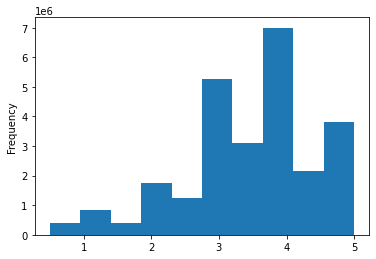

In [299]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

# Merge Datasets

In [300]:
# Merging the two datasets
movies_df=pd.merge(wiki_movies_df,movie_metadata,on="imdb_id", suffixes=["_wiki","_kaggle"])

In [301]:
sorted(movies_df.columns.to_list())

['Based on',
 'Cinematography',
 'Composer(s)',
 'Country of origin',
 'Director',
 'Distributor',
 'Editor(s)',
 'Original language(s)',
 'Producer(s)',
 'Production company(s)',
 'Starring',
 'Writer(s)',
 'belongs_to_collection',
 'box_office',
 'budget_kaggle',
 'budget_wiki',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'imdb_link',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date_kaggle',
 'release_date_wiki',
 'revenue',
 'running_time',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title_kaggle',
 'title_wiki',
 'url',
 'video',
 'vote_average',
 'vote_count',
 'year']

# Competing data:
| Wiki|Movielens |Resolution|
|-----|----|------|
|title_wiki|title_kaggle|Drop Wiki|
|running_time|runtime|Drop Wiki, but populate emply kaggle data first|
|budget_wiki|budget_kaggle|Drop Wiki, but populate emply kaggle data first|
|box_office|revenue|Drop Wiki, but populate emply kaggle data first|
|release_date_wiki |release_date_kaggle|Drop Wiki|
|Original language(s)|original_language|Drop wiki|
|Production company(s)|production_companies|Drop wiki|

In [302]:
# Column analysis - title
movies_df[movies_df["title_wiki"]!=movies_df["title_kaggle"]][["title_wiki","title_kaggle"]]

,title_wiki,title_kaggle
27,China Cry,China Cry: A True Story
36,Daddy's Dyin' ...Who's Got the Will?,Daddy's Dyin'... Who's Got the Will?
38,The Dark Side of the Moon,The Dark Side of The Moon
42,Delta Force 2,Delta Force 2: The Colombian Connection
48,DuckTales the Movie:Treasure of the Lost Lamp,DuckTales: The Movie - Treasure of the Lost Lamp
...,...,...
5956,Chips,CHiPS
5971,Spark,Spark: A Space Tail
5994,Pirates of the Caribbean:Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales
6023,Valerian and the Cityof a Thousand Planets,Valerian and the City of a Thousand Planets


In [303]:
# Show any rows where title_kaggle is empty
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Director,Distributor,Editor(s),...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


<AxesSubplot:xlabel='running_time', ylabel='runtime'>

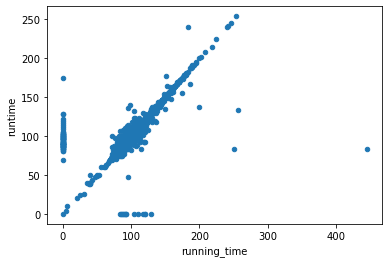

In [304]:
# Column analysis- running time
movies_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')

<AxesSubplot:xlabel='budget_wiki', ylabel='budget_kaggle'>

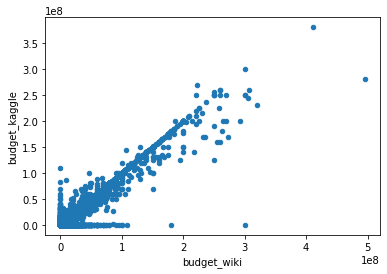

In [305]:
# Column analysis- budget
movies_df.fillna(0).plot(x='budget_wiki', y='budget_kaggle', kind='scatter')

<AxesSubplot:xlabel='box_office', ylabel='revenue'>

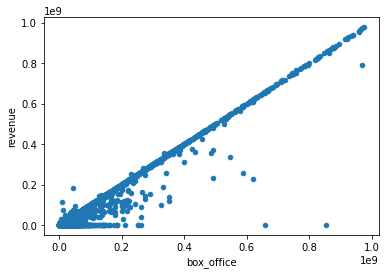

In [306]:
# Column analysis- revenue
movies_df.fillna(0)[movies_df['box_office'] < 10**9].plot(x='box_office', y='revenue', kind='scatter')

<AxesSubplot:xlabel='release_date_wiki'>

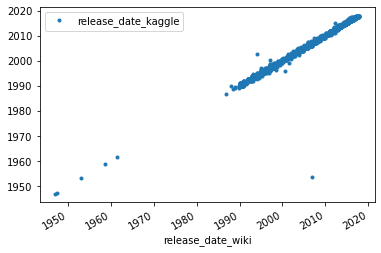

In [307]:
# Column analysis- release date
movies_df[['release_date_wiki','release_date_kaggle']].plot(x='release_date_wiki', y='release_date_kaggle', style='.')

In [308]:
# Drop the row since data is inconsistent
movies_df.drop(movies_df[(movies_df["release_date_wiki"]>'2000-01-01')&(movies_df["release_date_kaggle"]<'1960-01-01')].index,inplace=True)

In [309]:
# Check for missing wiki date
print(movies_df['release_date_wiki'].isnull().sum())
print(movies_df['release_date_kaggle'].isnull().sum())

11
0


In [310]:
# Column analysis - language
movies_df[movies_df["Original language(s)"]!=movies_df["original_language"]][["Original language(s)","original_language"]]

,Original language(s),original_language
0,English,en
1,English,en
2,"[English, Lao]",en
3,English,en
4,English,en
...,...,...
6047,Spanish,es
6048,English,en
6049,Russian,ru
6050,English,en


In [311]:
# Analysis of wiki list
movies_df["Original language(s)"].apply(lambda x:tuple(x) if type(x)==list else x).value_counts()

English                                        5552
(English, Spanish)                               68
(English, French)                                35
(English, Japanese)                              25
(English, Russian)                               23
                                               ... 
English/German/Korean                             1
(English, Scottish Gaelic)                        1
(English, French, Italian, Spanish, German)       1
(English, Romanian, Latin)                        1
(English, Dutch)                                  1
Name: Original language(s), Length: 197, dtype: int64

In [312]:
# Analysis of kaggle list
movies_df['original_language'].value_counts(dropna=False)

en    5987
fr      16
es      10
it       8
de       6
pt       4
ja       4
zh       4
da       2
hi       2
ab       1
ko       1
ru       1
cn       1
ar       1
he       1
sv       1
tr       1
Name: original_language, dtype: int64

In [313]:
# Column analysis - language
movies_df[movies_df['Production company(s)']!=movies_df['production_companies']][['Production company(s)','production_companies']]

,Production company(s),production_companies
0,Silver Pictures,[{'name': 'Twentieth Century Fox Film Corporat...
1,Avenue Pictures,"[{'name': 'Avenue Pictures Productions', 'id':..."
2,"[Carolco Pictures, IndieProd Company]","[{'name': 'IndieProd Company Productions', 'id..."
3,NaN,"[{'name': 'Orion Pictures', 'id': 41}]"
4,NaN,"[{'name': 'Paramount Pictures', 'id': 4}]"
...,...,...
6047,"[Fabula, Komplizen Film]","[{'name': 'Komplizen Film', 'id': 1618}, {'nam..."
6048,Ball & Chain Productions,"[{'name': 'Ball & Chain Productions', 'id': 74..."
6049,"[Arte France Cinéma, Why Not Productions]","[{'name': 'ARTE France Cinéma', 'id': 94}, {'n..."
6050,"[Film Science, Rough House Pictures, Syncopate...","[{'name': 'Film Science', 'id': 1976}, {'name'..."


In [314]:
# Dropping unwanted wiki columns
movies_df.drop(columns=['title_wiki','release_date_wiki','Original language(s)','Production company(s)'], inplace=True)

In [315]:
# Defining function to copy and drop columns
def fill_missing_column_data (df,kaggle_column,wiki_column):
    df[kaggle_column].fillna(0)
    df[kaggle_column]=df.apply(lambda row: row[wiki_column] if row[kaggle_column]==0 else row[kaggle_column],axis=1)
    df.drop(wiki_column,axis='columns',inplace=True)

In [316]:
# Replacing missing kaggle data
fill_missing_column_data (movies_df,"budget_kaggle","budget_wiki")

In [317]:
# Replacing missing kaggle data
fill_missing_column_data(movies_df, 'runtime', 'running_time')
fill_missing_column_data(movies_df, 'revenue', 'box_office')

In [318]:
sorted(movies_df.columns.to_list())

['Based on',
 'Cinematography',
 'Composer(s)',
 'Country of origin',
 'Director',
 'Distributor',
 'Editor(s)',
 'Producer(s)',
 'Starring',
 'Writer(s)',
 'belongs_to_collection',
 'budget_kaggle',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'imdb_link',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date_kaggle',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title_kaggle',
 'url',
 'video',
 'vote_average',
 'vote_count',
 'year']

In [319]:
# Performing value count to identify columns with single type of value
for col in movies_df.columns:
    lists_to_tuples = lambda x: tuple(x) if type(x) == list else x
    value_counts = movies_df[col].apply(lists_to_tuples).value_counts(dropna=False)
    num_values = len(value_counts)
    if num_values == 1:
        print(col)

video


In [320]:
# This column will be excluded since it has only one type of value, but this issue occured due to error in coding
movies_df['video'].value_counts(dropna=False)

False    6051
Name: video, dtype: int64

In [330]:
# Reordering columns
movies_df = movies_df.loc[:, ['imdb_id','id','title_kaggle','original_title','tagline','belongs_to_collection','url','imdb_link',
                       'runtime','budget_kaggle','revenue','release_date_kaggle','popularity','vote_average','vote_count',
                       'genres','original_language','overview','spoken_languages','Country of origin',
                       'production_companies','production_countries','Distributor',
                       'Producer(s)','Director','Starring','Cinematography','Editor(s)','Writer(s)','Composer(s)','Based on'
                      ]]

In [331]:
# Renaming columns
movies_df.rename({'id':'kaggle_id',
                  'title_kaggle':'title',
                  'url':'wikipedia_url',
                  'budget_kaggle':'budget',
                  'release_date_kaggle':'release_date',
                  'Country':'country',
                  'Distributor':'distributor',
                  'Producer(s)':'producers',
                  'Director':'director',
                  'Starring':'starring',
                  'Cinematography':'cinematography',
                  'Editor(s)':'editors',
                  'Writer(s)':'writers',
                  'Composer(s)':'composers',
                  'Based on':'based_on'
                 }, axis='columns', inplace=True)

In [346]:
# Grouping rating data by rating for each movie
rating_counts = ratings.groupby(['movieId','rating'], as_index=False).count()\
                .rename({'userId':'count'}, axis=1)\
                .pivot(index="movieId",columns="rating",values="count")

In [347]:
# Renaming columns
rating_counts.columns=["rating_"+str(col) for col in rating_counts.columns]
rating_counts.head()

,rating_0.5,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5.0
movieId,,,,,,,,,,
1,441.00,804.00,438.00,"2,083.00","1,584.00","11,577.00","5,741.00","22,020.00","5,325.00","15,995.00"
2,263.00,797.00,525.00,"2,479.00","1,810.00","8,510.00","2,916.00","6,035.00",690.00,"2,035.00"
3,169.00,772.00,233.00,"1,665.00",616.00,"6,213.00",759.00,"3,433.00",154.00,"1,483.00"
4,47.00,351.00,31.00,496.00,77.00,"1,133.00",66.00,557.00,12.00,211.00
5,237.00,785.00,270.00,"1,716.00",664.00,"6,608.00",723.00,"2,959.00",166.00,"1,130.00"


In [348]:
movies_with_ratings_df = pd.merge(movies_df, rating_counts, left_on='kaggle_id', right_index=True, how='left')

In [349]:
movies_with_ratings_df.head()

,imdb_id,kaggle_id,title,original_title,tagline,belongs_to_collection,wikipedia_url,imdb_link,runtime,budget,...,rating_0.5,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5.0
0,tt0098987,9548,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane,Kojak. Columbo. Dirty Harry. Wimps.,NaN,https://en.wikipedia.org/wiki/The_Adventures_o...,https://www.imdb.com/title/tt0098987/,104.00,"49,000,000.00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0098994,25501,"After Dark, My Sweet","After Dark, My Sweet",All they risked was everything.,NaN,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",https://www.imdb.com/title/tt0098994/,114.00,"6,000,000.00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0099005,11856,Air America,Air America,The few. The proud. The totally insane.,NaN,https://en.wikipedia.org/wiki/Air_America_(film),https://www.imdb.com/title/tt0099005/,112.00,"35,000,000.00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0099012,8217,Alice,Alice,NaN,NaN,https://en.wikipedia.org/wiki/Alice_(1990_film),https://www.imdb.com/title/tt0099012/,102.00,"12,000,000.00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0099018,25943,Almost an Angel,Almost an Angel,Who does he think he is?,NaN,https://en.wikipedia.org/wiki/Almost_an_Angel,https://www.imdb.com/title/tt0099018/,95.00,"25,000,000.00",...,3.00,NaN,3.00,2.00,5.00,26.00,37.00,46.00,16.00,11.00


In [350]:
# Populating rating count columns with 0. rating_counts.columns is a list of columns
movies_with_ratings_df[rating_counts.columns] = movies_with_ratings_df[rating_counts.columns].fillna(0)